# 線型回帰モデル

$n$個のデータ$(x_1,y_1),...(x_n,y_n)$が観測され、各$y_i$が
$$
y_i=\alpha +\beta x_i+u_i,\ i=1,...,n
$$

- 説明変数$x_1,...x_n$は確率変数ではなく、与えられた定数である
- $E[u_i]=0,\ i=1,...,n$
- $E[u_i u_j]=0(i\neq j)$
- $Var(u_i)= \sigma ^2$, すなわち分散は均一である

## 最小二乗法

最小二乗法の目標は、与えられたデータセットに対して予測された値（モデルの出力）と実際の値（データセットの出力）の差を最小化することである。

$$
h(\alpha,\beta)= \sum_{i=1}^n (y_i-\alpha-\beta x_i)^2
$$


$E[h(\alpha,\beta)]=0$から,母集団における$\alpha$と$\beta$を求めるが、これはあくまでも母集団の概念である。実際に持っているのは母集団に対応する標本であって、母集団そのもののは手に入りません。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)=0
$$

データから得られる推定値を$\hat{\alpha}, \hat{\beta}$で定義する。

$$
\frac{1}{n} \sum_{i=1}^n (y_i-\hat{\alpha}-\hat{\beta}x_i)
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)-\frac{1}{n} \sum_{i=1}^n \hat{\alpha}- \frac{1}{n} \sum_{i=1}^n \hat{\beta}x_i 
\\
=\frac{1}{n} \sum_{i=1}^n (y_i)- \hat{\alpha}- \hat{\beta} \frac{1}{n} \sum_{i=1}^n x_i
\\
= \bar{y} - \hat{\alpha} - \hat{\beta}\bar{x}
$$

ここで、$\bar{y}$は標本平均と呼ぶ。この式を切片について書き直すと、

$$\hat{\alpha}　= \bar{y}  - \hat{\beta}\bar{x}$$

この式を　
$$
\frac{1}{n} \sum_{i=1}^n x_i(y_i-\hat{\alpha}-\hat{\beta}x_i)=0 (条件付き期待値ゼロ仮定　E(u|x)=0 より)
$$
に代入すると

$$
\sum_{i=1}^n x_i(y_i-(\bar{y}  - \hat{\beta}\bar{x})-\hat{\beta}x_i)=0
$$

$$
\sum_{i=1}^n x_i(y_i-\bar{y})=\hat{\beta} \sum_{i=1}^n x_i(\bar{x}-x_i)
$$

ここで、
$$
\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}) = \sum_{i=1}^n x_i(y_i-\bar{y}) = \sum_{i=1}^n y_i(x_i-\bar{x})
$$

$$
\sum_{i=1}^n (x_i-\bar{x})^2 = \sum_{i=1}^n x_i^2-n(\bar{x})^2
$$

この式から$\hat{\beta}$を解くと、

$$
\hat{\beta}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{標本共分散(x_i,y_i)}{標本分散(x_i)}
$$
そして、$\hat{\alpha}$も得られる
$$
\hat{\alpha}=\hat{y}-\hat{\beta}\bar{x}
$$

任意の推定値$\hat{\alpha},\hat{\beta}$に関して、$i$に関する当てはめる値(fitted value)を
$$
\hat{y_i}=\hat{\alpha} +\hat{\beta} x_i
$$
と定義する。

回帰直線と観測値との差
$$
\hat{u_i}=y_i-\hat{y_i}
$$
を残差(residual)といいます。

残差の二乗の和をとったもの
$$
RSS=\sum_{i=1}^n \hat{u_i}^2
$$
を残差平方和(residual sum of squares, RSS)といいます。

ここで、残差平方和を最小にするような$\hat{\alpha}$と$\hat{\beta}$を選びます。

In [1]:
import numpy as np

# サンプルデータ
# パラメータ
beta_0 = 2.5  # 切片
beta_1 = 0.8  # 傾き
n = 100  # データ数

# 説明変数を一様分布から生成
x = np.random.uniform(low=0, high=10, size=n)

# ノイズ項を標準正規分布から生成
epsilon = np.random.normal(loc=0, scale=1, size=n)

# 目的変数を生成
y = beta_0 + beta_1 * x + epsilon

In [2]:
# パラメータの推定
x_mean = np.mean(x)
y_mean = np.mean(y)

# β₁の推定
numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)
beta = numerator / denominator
print("beta: ", beta)
# β₀の推定
alpha = y_mean - beta * x_mean

print("alpha: ", alpha)

beta:  0.7399836553184265
alpha:  2.76837607262028


In [3]:
# 予測値の計算
y_pred = alpha + beta * x

# 残差の計算
residuals = y - y_pred

# 残差の合計の確認
residual_sum = np.sum(residuals)

print("残差の合計:", residual_sum)

残差の合計: 4.973799150320701e-14


In [4]:
import numpy as np
import proplot as plt


# Creating a figure and axes
fig, ax = plt.subplots(refwidth=4)

# Scatter plot of the data points
ax.scatter(x, y, color='blue', label='Data Points',alpha=0.6)

# Regression line
x_line = np.linspace(0, 10, 100)
y_line = beta_0 + beta_1 * x_line
ax.plot(x_line, y_line, color='red', label='Regression Line')

# Vertical lines and residuals
for i in range(n):
    x_i = x[i]
    y_i = y[i]
    y_pred_i = beta_0 + beta_1 * x_i
    ax.vlines(x_i, y_i, y_pred_i, color='gray', linestyle='dotted')

# Plot settings
ax.format(xlabel='x', ylabel='y', title='Linear Regression')
ax.legend(loc="lower right")

# Display the plot
plt.show()

ModuleNotFoundError: No module named 'proplot'

## 決定係数


- 総変動(total sum of squares; SST)
$$
SST=\sum_{i=1}^n (y_i-\bar{y})^2
$$

- 説明された変動(explained sum of squares; SSE)
$$
SSE=\sum_{i=1}^n (\hat{y_i}-\bar{y})^2
$$

- 残差二乗和(residual sum of squares; SSR)
$$
SSR=\sum_{i=1}^n (\hat{u_i})^2
$$

$y_i$の全変動のうち、$x_i$で説明される割合を
$$
R^2=\frac{SSE}{SST}=1-\frac{SSR}{SST}
$$

決定係数と呼ばれます。

## 推定量の確率的性質

OLSの仮定に基づいて、母集団から繰り返しサンプリングするごとに、それぞれ異なる推定値($\hat{\beta_1}$)が得られたが、十分な回数にわたってランダムに抽出されると、平均で真のパラメータ($\beta$)に等しいという信念が与えてくれます。この性質を、**不偏性(unbiasedness)** と呼ばれます。

$$
E(\hat{\beta})=\beta
$$


OLSが不偏性を持つためにはいくつかの仮定が必要です。

- パラメータに関する線型: 母集団モデル　$y=\alpha +\beta x+u$　を仮定します。
- ランダムサンプリング: 母集団モデルに従う、大きさ$n$のランダム標本 ${(x_i,y_i):i=1,...,n}$ を仮定します。それぞれの$i$を母集団からランダムに抽出していれば、$i$について$y_i=\alpha +\beta x_i+u_i,\ i=1,...,n$と書くことができます。
- 説明変数の標本変更: ある標本において、$x_i$が全て同じではないです。
- 条件付き期待値ゼロ仮定:母集団において、説明変数の値に関わらず誤差項の平均が$0$です。$E(u|x)=E(u)=0$

これらの仮定のもとで、ランダムに抽出された標本からパラメータを推定したとき、$\hat{\beta}$の期待値が$\beta$の周りに集まることを示す必要があります。


### 均一分散(homoskedasticity)

サンプリングに伴う推定量の分布のばらつき、つまり分散と標準偏差、を測る必要があります。


均一分散は、母集団の誤差項$u$が、説明変数$x$のいかなる値においても、同じ分散をもつことを意味しています。
$$
V(u|x)=\sigma ^2
$$
誤差項がランダムに平均$0$,分散$\sigma ^2$で分布していることは、$y_i$の変動を回帰直線で説明しきれない部分に何ら情報や傾向性が存在しない時に、単回帰モデルの当てはまりがよいことになります。そのため、誤差項$u_i$の推定値である残差に何らかの傾向性が残っている時に回帰直線での近似だけでは不十分です。

$$
\hat{\beta}-\beta =\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})-\beta (x_i-\bar{x})^2 }{\sum_{i=1}^n (x_i-\bar{x})^2} = \frac{\sum_{i=1}^n [(x_i-\bar{x})(y_i-\bar{y})- (x_i-\bar{x})\beta] }{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{\sum_{i=1}^n (x_i-\bar{x})(u_i-\bar{u})}{\sum_{i=1}^n (x_i-\bar{x})^2}=\frac{\sum_{i=1}^n (x_i-\bar{x})u_i}{\sum_{i=1}^n (x_i-\bar{x})^2}
$$

これより、

$$
E[\hat{\beta}-\beta]=0
$$

$$
Var[\hat{\beta}]=E[(\hat{\beta}-\beta)^2]= \frac{\sum_{i=1}^n (x_i-\bar{x})^2 E(u_i^2)}{ \sum_{i=1}^n (x_i-\bar{x})^2}= \frac{\sigma ^2}{\sum_{i=1}^n (x_i-\bar{x})^2}
$$

$\beta$に影響を与える要因は、
- 誤差の分散$\sigma ^2$が大きくなると、推定値の分散も大きくなります。つまり$y$と$x$の関係にノイズが多い($u$の変動が大きい)と、$\beta$に関して読み取るのは難しくなります。
- $x_i$の分散が大きいほど$\hat{\beta}$の推定精度が高くなります。

また、母集団の分散は$\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1}$であり、標本分散は$\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}$であるため、$n$が大きくなると、$x$の標本分散は母集団の分散である$\sigma ^2$に近づいていきます。そのため、サンプルサイズが増やすと、サンプリングの伴う推定値の分散が小さくすることができます。

In [1]:
import numpy as np

# サンプルデータ
# パラメータ
beta_0 = 2.5  # 切片
beta_1 = 0.8  # 傾き
n = 10000  # データ数

# 説明変数を一様分布から生成
x = np.random.uniform(low=0, high=10, size=n)

# ノイズ項を標準正規分布から生成
epsilon = np.random.normal(loc=0, scale=1, size=n)

# 目的変数を生成
y = beta_0 + beta_1 * x + epsilon

In [2]:
# サンプリング回数とサンプルサイズ
n_sampling = 300
sample_size = 100

# 推定値の格納用配列
beta_0_estimates = np.zeros(n_sampling)
beta_1_estimates = np.zeros(n_sampling)

# 繰り返しサンプリングと推定
for i in range(n_sampling):
    indices = np.random.choice(10000, size=sample_size, replace=False)
    x_sample = x[indices]
    y_sample = y[indices]

    x_mean = np.mean(x_sample)
    y_mean = np.mean(y_sample)
    numerator = np.sum((x_sample - x_mean) * (y_sample - y_mean))
    denominator = np.sum((x_sample - x_mean) ** 2)
    beta_1_estimates[i] = numerator / denominator
    beta_0_estimates[i] = y_mean - beta_1_estimates[i] * x_mean

# 推定値の平均
beta_0_mean = np.mean(beta_0_estimates)
beta_1_mean = np.mean(beta_1_estimates)

print("切片の推定値:", beta_0_mean)
print("傾きの推定値:", beta_1_mean)

切片の推定値: 2.5095748687836283
傾きの推定値: 0.7973409699012524


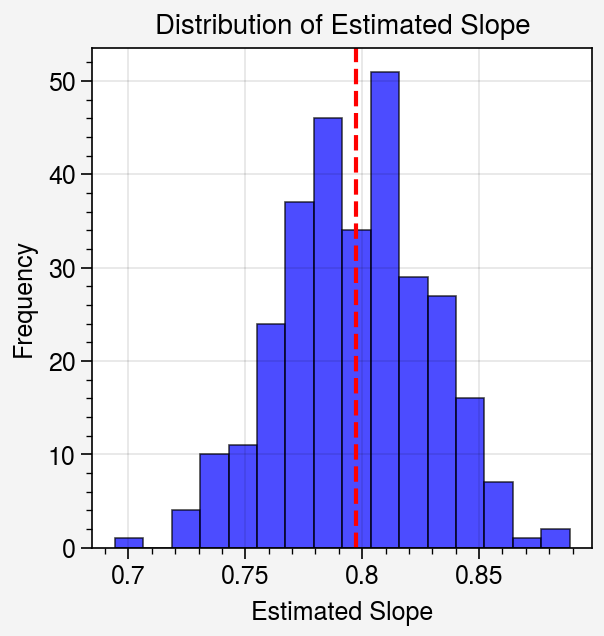

In [3]:
import numpy as np
import proplot as plt

# Estimated slope values

# Creating a figure and axes
fig, ax = plt.subplots()

# Histogram of estimated slope values
ax.hist(beta_1_estimates, bins='auto', color='blue', alpha=0.7, edgecolor='black')
ax.axvline(beta_1_mean, color='red', linestyle='--', label='Mean Estimate')

# Plot settings
ax.format(xlabel='Estimated Slope', ylabel='Frequency', title='Distribution of Estimated Slope')

# Display the plot
plt.show()

In [4]:
def estimate_slope(x_population, y_population, n_sampling, sample_size):
    # 推定値の格納用配列
    beta_1_estimates = np.zeros((n_sampling, sample_size))

    # 繰り返しサンプリングと推定
    for i in range(n_sampling):
        indices = np.random.choice(len(x_population), size=sample_size, replace=False)
        x_sample = x_population[indices]
        y_sample = y_population[indices]

        x_mean = np.mean(x_sample)
        y_mean = np.mean(y_sample)
        numerator = np.sum((x_sample - x_mean) * (y_sample - y_mean))
        denominator = np.sum((x_sample - x_mean) ** 2)
        beta_1_estimates[i] = numerator / denominator

    return beta_1_estimates

# 母集団データの生成
np.random.seed(1)
x_population = np.random.uniform(low=0, high=10, size=10000)
epsilon_population = np.random.normal(loc=0, scale=1, size=10000)
y_population = 2.5 + 0.8 * x_population + epsilon_population

# サンプリング回数とサンプルサイズ
n_sampling = 300
sample_size_1 = 100
sample_size_2 = 500
sample_size_3 = 1000
# 傾きの推定値を計算
beta_1_estimates_1 = estimate_slope(x_population, y_population, n_sampling, sample_size_1)
beta_1_estimates_2 = estimate_slope(x_population, y_population, n_sampling, sample_size_2)
beta_1_estimates_3 = estimate_slope(x_population, y_population, n_sampling, sample_size_3)


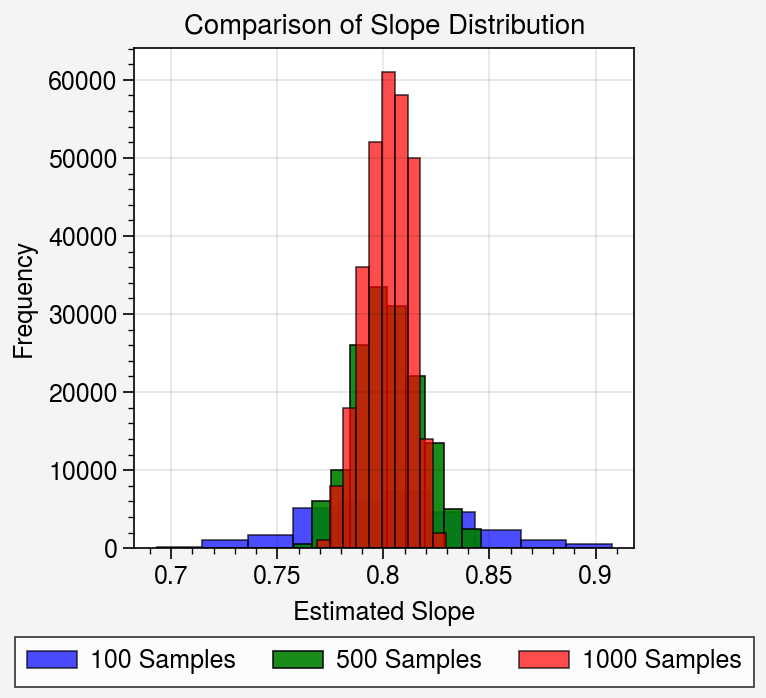

In [5]:
# Creating a figure and axes
fig, ax = plt.subplots()

# Histogram of estimated slope values (100 samples)
ax.hist(beta_1_estimates_1.flatten(), color='blue', alpha=0.7, edgecolor='black', label='{} Samples'.format(sample_size_1))

# Histogram of estimated slope values (500 samples)
ax.hist(beta_1_estimates_2.flatten(),  color='green', alpha=0.9, edgecolor='black', label='{} Samples'.format(sample_size_2))

# Histogram of estimated slope values (1000 samples)
ax.hist(beta_1_estimates_3.flatten(),  color='red', alpha=0.7, edgecolor='black', label='{} Samples'.format(sample_size_3))

# Plot settings
ax.format(xlabel='Estimated Slope', ylabel='Frequency', title='Comparison of Slope Distribution')
ax.legend(loc='bottom')

# Display the plot
plt.show()